In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  


In [2]:
from hogares import EncuestaHogares

encuesta = EncuestaHogares("usu_hogar_T324.xlsx", "usu_individual_T324.xlsx")
hogares, personas = encuesta.memoria()
hogares, personas = encuesta.filtrados_por_region(43, hogares, personas)
subconjunto_hogares, subconjunto_personas = encuesta.subconjunto_columnas(hogares, personas)
subconjunto_hogares_personas = encuesta.df_hogares_personas(subconjunto_hogares, subconjunto_personas)

### Edad
Cuantitativa discreta

In [3]:
personas["edad"].describe()

count    14315.000000
mean        37.251764
std         22.394482
min         -1.000000
25%         18.000000
50%         35.000000
75%         55.000000
max        102.000000
Name: edad, dtype: float64

#### Valores Faltantes/Incorrectos
Hay 101 personas con edad -1.

In [4]:
len(personas[(personas["edad"]==-1)])

101

Se evalúa la fecha de nacimiento

In [5]:
estado = pd.DataFrame([
    (0, "Encuesta no realizada"),
    (1, "Ocupado"),
    (2, "Desocupado"),
    (3, "Inactivo"),
    (4, "Menor de 10 años")
], columns=["estado_actividad", "estado_nombre"])

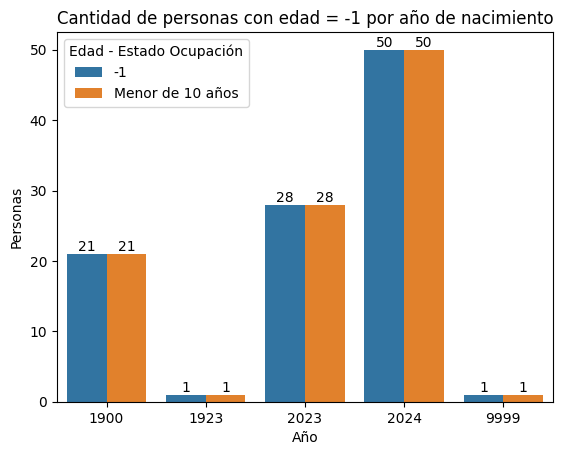

In [6]:
pd.options.mode.copy_on_write = True
ocurrencias_por_anio = pd.merge(personas[personas["edad"]==-1][["edad", "CH05", "estado_actividad"]], estado, on="estado_actividad")
ocurrencias_por_anio.loc[:, "año"] = ocurrencias_por_anio["CH05"].apply(lambda dt: dt.year)
ocurrencias_por_anio = pd.melt(ocurrencias_por_anio, id_vars=['año', "CH05", "estado_actividad"])
ocurrencias_por_anio

g = sns.countplot(data=ocurrencias_por_anio,  x="año", hue="value")
for i in g.containers:
    g.bar_label(i,)
g = g.set(xlabel='Año', ylabel='Personas')
g = plt.legend(title='Edad - Estado Ocupación', loc='upper left')
g = plt.title("Cantidad de personas con edad = -1 por año de nacimiento")


Se reemplazan los -1 por 0 asumiendo que las fechas de nacimiento correspondientes a los años 1900, 1923 y 9999 son errores de carga.

In [7]:
personas.loc[personas["edad"] == -1, "edad"] = 0

Se grafican la distribución de edades como histograma

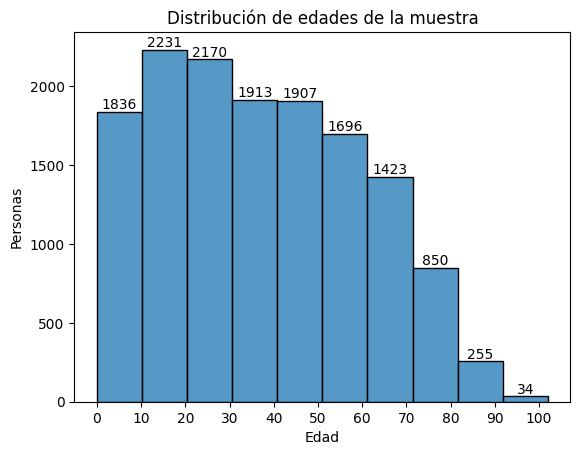

In [8]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
g = sns.histplot(data=personas, x="edad", binwidth=10, ax=ax)
for i in g.containers:
    g.bar_label(i,)
g.xaxis.set_major_locator(ticker.MultipleLocator(10))
g = g.set(xlabel='Edad', ylabel='Personas')
plt.title("Distribución de edades de la muestra")
plt.show()

# Transformación de la Variable Ingreso
Se reemplazan los valores nulos, causados por la encuesta no realizada, por la mediana y no se consideran las no respuestas de ingresos 2411.

In [9]:
personas["ingreso"].isnull().sum()

np.int64(15)

In [10]:
len(personas[personas["ingreso"]==-9])

2411

In [11]:
personas.loc[personas["ingreso"].isnull(), "ingreso"] = personas[personas["ingreso"]!=-9]["ingreso"].median()

#### Ingresos por Edad 

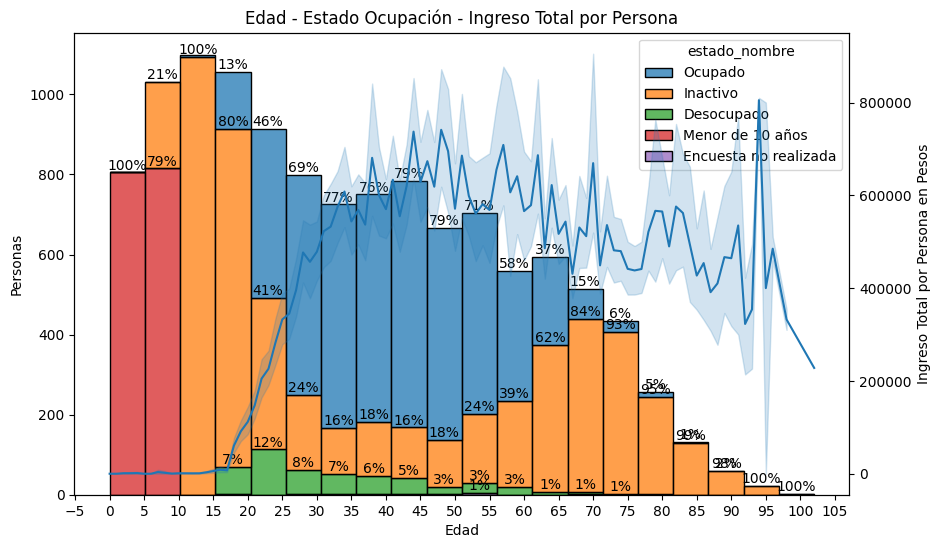

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
personas_estado = pd.merge(personas[personas["ingreso"]!=-9], estado, on="estado_actividad")
g = sns.histplot(data=personas_estado, x="edad", binwidth=5, ax=ax, hue="estado_nombre", multiple="stack")
patches = []
for i, bars in enumerate(ax.containers):
    for j, bar in enumerate(bars.datavalues):
        if len(patches) <= j:
            patches.append([])
        patches[j].append(bars.datavalues[j])

for i, bars in enumerate(ax.containers):
    labels = []
    for j, bar in enumerate(bars.patches):
        p = round(patches[j][i]*100/sum(patches[j]),0)
        labels.append(f"{p:.0f}%" if p > 0 else "")
    
    ax.bar_label(bars, labels=labels)    
g.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set(xlabel='Edad', ylabel='Personas')

ax2 = ax.twinx()  
sns.lineplot(data=personas_estado, x="edad", y="ingreso", ax=ax2)
ax2.set(ylabel='Ingreso Total por Persona en Pesos')
plt.title("Edad - Estado Ocupación - Ingreso Total por Persona")
plt.show()

#### Categorización de Variable Ingresos

In [34]:
personas.loc[personas["ingreso"]==0, "Rango Ingresos"] = "Sin Ingreso"
personas.loc[(personas["ingreso"]>0)&(personas["ingreso"]<=1000000), "Rango Ingresos"] = "0 - 1m"
personas.loc[(personas["ingreso"]>1000000), "Rango Ingresos"] = "+1m"

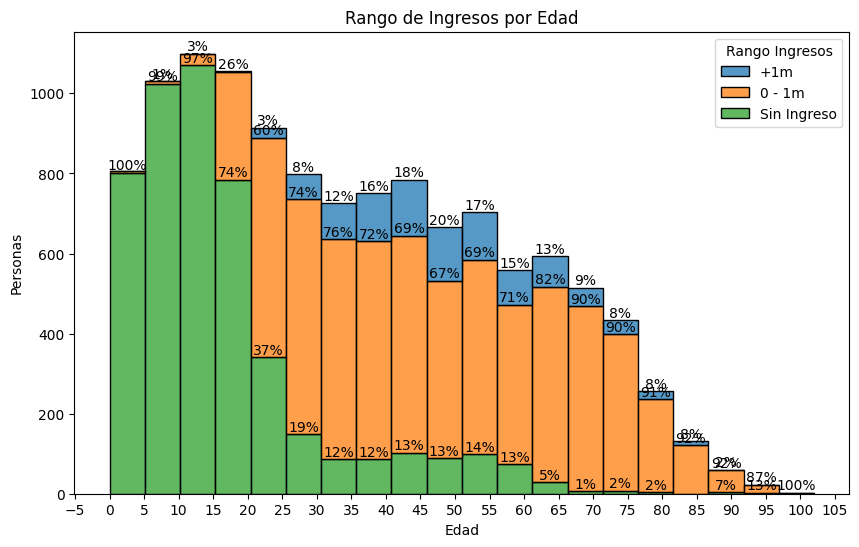

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.histplot(data=personas, x="edad", binwidth=5, ax=ax, hue="Rango Ingresos", multiple="stack")

patches = []
for i, bars in enumerate(ax.containers):
    for j, bar in enumerate(bars.datavalues):
        if len(patches) <= j:
            patches.append([])
        patches[j].append(bars.datavalues[j])

for i, bars in enumerate(ax.containers):
    labels = []
    for j, bar in enumerate(bars.patches):
        p = round(patches[j][i]*100/sum(patches[j]),0)
        labels.append(f"{p:.0f}%" if p > 0 else "")
    
    ax.bar_label(bars, labels=labels)
g.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set(xlabel='Edad', ylabel='Personas')
plt.title("Rango de Ingresos por Edad")
plt.show()

### Análisis de no Respuestas para el Ingreso
#### Relación con el Nivel Educativo

In [134]:
nivel_educativo = pd.DataFrame([
    (1, "Primario incompleto (incluye educación especial)"),
    (2, "Primario completo"),
    (3, "Secundario incompleto"),
    (4, "Secundario completo"),
    (5, "Superior universitario incompleto"),
    (6, "Superior universitario completo"),
    (7, "Sin instrucción"),
    (9, "Ns/Nr"),
    ], columns=["nivel_educativo", "nivel_educativo_nombre"])

In [ ]:
pd.merge(personas[personas["ingreso"]==-9][["nivel_educativo"]],nivel_educativo, on="nivel_educativo")

sns.cat

,nivel_educativo,nivel_educativo_nombre
0,6,Superior universitario completo
1,6,Superior universitario completo
2,3,Secundario incompleto
3,5,Superior universitario incompleto
4,5,Superior universitario incompleto
...,...,...
2406,4,Secundario completo
2407,4,Secundario completo
2408,6,Superior universitario completo
2409,6,Superior universitario completo
